In [10]:
import torch
import matplotlib.pyplot as plt

def euler(f, h0, t0, t1, steps):
    h = h0
    dt = (...) / steps
    t = t0
    for _ in range(steps):
        h = ...   # forward Euler step
        t = ...
    return h

def rk4(f, h0, t0, t1, steps):
    h = h0
    dt = (t1 - t0) / steps
    t = t0
    for _ in range(steps):
        k1 = ...
        k2 = ...
        k3 = ...
        k4 = ...
        h = ...
        t = t + dt
    return h

# -------------------------------------------------
# ODE: 2D projectile motion (cannonball)
#    state h = [x, y, vx, vy]
#    dx/dt = ??
#    dy/dt = ??
#    dvx/dt = ??
#    dvy/dt = ??
# -------------------------------------------------


g = 9.81

def projectile_ode(t, h):
    deriv = torch.zeros_like(h)
    deriv[0] = ...          # dx/dt
    deriv[1] = ...          # dy/dt
    deriv[2] = ...           # dvx/dt
    deriv[3] = ...           # dvy/dt
    return deriv

def trajectory(method, f, h0, t0, t1, steps):
    """
    At each sample time tk, we re-integrate from t0 -> tk with k steps.
    """
    ts = torch.linspace(..., ..., ... + 1)
    hs = []
    for k in range(... + 1):
        if k == 0:
            hs.append(...)
        else:
            tk = ts[k].item()
            hk = ...(f, h0, t0, tk, k)  # k steps from t0 to tk
            hs.append(hk)
    hs = torch.stack(hs, dim=0)  # shape: [steps+1, 4]
    return ts, hs


v0 = 30.0                    # initial speed (m/s)
angle_deg = 45.0             # launch angle
angle_rad = ...(angle_deg)

x0, y0 = 0.0, 0.0
vx0 = v0 * torch....(torch.tensor(...))
vy0 = v0 * torch....(torch.tensor(...))

h0 = torch.tensor([x0, y0, vx0.item(), vy0.item()], dtype=torch.float32)

# Flight time until projectile returns to y=0 (analytic)
t_flight = 2 * vy0 / g
t0, t1 = 0.0, t_flight.item()

steps = 10

ts_euler, hs_euler = trajectory(..., ..., ..., ..., ..., ...)
ts_rk4,   hs_rk4   = trajectory(..., ..., ..., ..., ..., ...)


ts_true = torch.linspace(t0, t1, 400)
x_true = x0 + vx0 * ts_true
y_true = y0 + vy0 * ts_true - 0.5 * g * ts_true**2

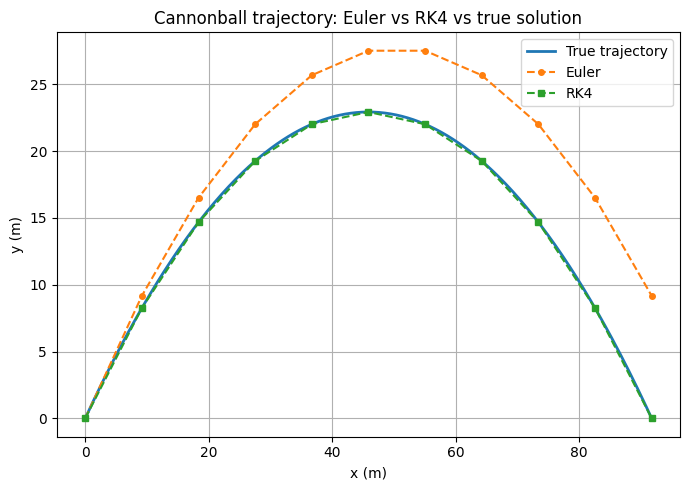

In [11]:
plt.figure(figsize=(7, 5))
plt.plot(x_true.numpy(), y_true.numpy(), label="True trajectory", linewidth=2)
x_euler = hs_euler[:, 0]
y_euler = hs_euler[:, 1]
plt.plot(x_euler.numpy(), y_euler.numpy(), "o--", label="Euler", markersize=4)
x_rk4 = hs_rk4[:, 0]
y_rk4 = hs_r4 = hs_rk4[:, 1]
plt.plot(x_rk4.numpy(), y_rk4.numpy(), "s--", label="RK4", markersize=4)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cannonball trajectory: Euler vs RK4 vs true solution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

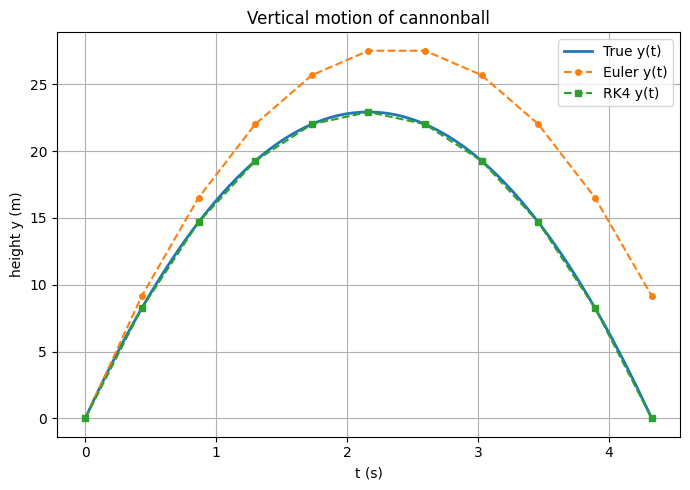

In [12]:
plt.figure(figsize=(7, 5))

plt.plot(ts_true.numpy(), y_true.numpy(), label="True y(t)", linewidth=2)
plt.plot(ts_euler.numpy(), y_euler.numpy(), "o--", label="Euler y(t)", markersize=4)
plt.plot(ts_rk4.numpy(), y_rk4.numpy(), "s--", label="RK4 y(t)", markersize=4)

plt.xlabel("t (s)")
plt.ylabel("height y (m)")
plt.title("Vertical motion of cannonball")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()